# Step 1

## Run the next cell to begin the automated lookup of Biolegend webIDs using Biolegend Catalog Numbers.

### Sometimes the script will time out and if it does then proceed to the next step to export the captured data.

In [8]:
#####GET WEBIDs v3

import requests
from bs4 import BeautifulSoup as bs
import numpy as np
import pandas as pd
import lxml
import os
import time
import random

url = 'https://www.biolegend.com/en-us/advanced-search?Keywords=100103&adv1-k1=100103'

page = requests.get(url)
page.text

soup = bs(page.text, 'html.parser' )

####################### LOCATION OF EXCEL FILE WITH BIOLEGEND CATALOG NUMBERS YOU NEED TO PULL webIDs FROM.#######
csv = pd.read_excel(io=r'C:\Users\Natei\Anaconda Projects\bio_webIDs.xlsx')
##################################################################################################################
cat_numbs = csv.get('catnum')
ids = csv.get('webID')

cat_number_array = np.array([])

    
for i in cat_numbs:
    cat_number_array = np.append(cat_number_array, i)
    ###################SPECIFIC RANGE JUST FOR REMAINING DATA##########

    webID = np.array([])
    
specific_range = cat_number_array[0:]
print(specific_range)
y = 0
for i in specific_range:
    if i == "Not Found":
        pass
    else:
        integer = int(float(i))
        url = 'https://www.biolegend.com/en-us/advanced-search?Keywords=' + str(integer) + '&adv1-k1=' + str(integer)
        print(url)
        page = requests.get(url)
        time.sleep(random.uniform(.85, 1.15))
        print(page.status_code)
        page.text
        soup = bs(page.text, 'html.parser' )
        #print(soup)
        links = np.array([])
        x=38
        for a in soup.find_all('link', href=True):
            if 'https://www.biolegend.com/en-us/products' in a['href']:
                split_first_part = a['href'].split('#')
                strip_second_part = split_first_part[0].strip("/en-us/products/")
                count_dashes = strip_second_part.count("-")
                if count_dashes > 0:
                    final_webID = strip_second_part.split("-")[count_dashes]
                    new_final_webID = final_webID.split('?')[0]
                    webID = np.append(webID, new_final_webID)
                    y = y + 1
                    print(new_final_webID + " , the length of webID array is: " + str(len(webID)))
                    #print("Y equals: " + str(y))
                    print("\n")
            else:
                continue

[120116. 120123. 120124. ... 329801. 117403. 512307.]
https://www.biolegend.com/en-us/advanced-search?Keywords=120116&adv1-k1=120116
200
4295 , the length of webID array is: 1


https://www.biolegend.com/en-us/advanced-search?Keywords=120123&adv1-k1=120123
200
13133 , the length of webID array is: 2


https://www.biolegend.com/en-us/advanced-search?Keywords=120124&adv1-k1=120124
200
13133 , the length of webID array is: 3


https://www.biolegend.com/en-us/advanced-search?Keywords=120124&adv1-k1=120124
200
13133 , the length of webID array is: 4


https://www.biolegend.com/en-us/advanced-search?Keywords=120125&adv1-k1=120125
200
14711 , the length of webID array is: 5


https://www.biolegend.com/en-us/advanced-search?Keywords=120208&adv1-k1=120208
200
2920 , the length of webID array is: 6


https://www.biolegend.com/en-us/advanced-search?Keywords=120306&adv1-k1=120306
200
2924 , the length of webID array is: 7


https://www.biolegend.com/en-us/advanced-search?Keywords=120406&adv1-k1=12

200
4074 , the length of webID array is: 66


https://www.biolegend.com/en-us/advanced-search?Keywords=123122&adv1-k1=123122
200
4074 , the length of webID array is: 67


https://www.biolegend.com/en-us/advanced-search?Keywords=123122&adv1-k1=123122
200
4074 , the length of webID array is: 68


https://www.biolegend.com/en-us/advanced-search?Keywords=123122&adv1-k1=123122
200
4074 , the length of webID array is: 69


https://www.biolegend.com/en-us/advanced-search?Keywords=123122&adv1-k1=123122
200
4074 , the length of webID array is: 70


https://www.biolegend.com/en-us/advanced-search?Keywords=123122&adv1-k1=123122
200
4074 , the length of webID array is: 71


https://www.biolegend.com/en-us/advanced-search?Keywords=123122&adv1-k1=123122
200
4074 , the length of webID array is: 72


https://www.biolegend.com/en-us/advanced-search?Keywords=123122&adv1-k1=123122
200
4074 , the length of webID array is: 73


https://www.biolegend.com/en-us/advanced-search?Keywords=123122&adv1-k1=123122


ConnectionError: HTTPSConnectionPool(host='www.biolegend.com', port=443): Max retries exceeded with url: /en-us/advanced-search?Keywords=123215&adv1-k1=123215 (Caused by NewConnectionError('<urllib3.connection.HTTPSConnection object at 0x0000024951522610>: Failed to establish a new connection: [WinError 10060] A connection attempt failed because the connected party did not properly respond after a period of time, or established connection failed because connected host has failed to respond'))

# Step 2

## Run Cell Below to Export webIDs as CSV

- Run the cell below after running Step 1 OR if the code in Step 1 has errored out.
- The cell below will export the data as a csv. 

## Always do a sanity check when pasting that the data from the script did not get misaligned in the process. (Lookup webID (circled in red) manually on Biolegend website using catalog number).

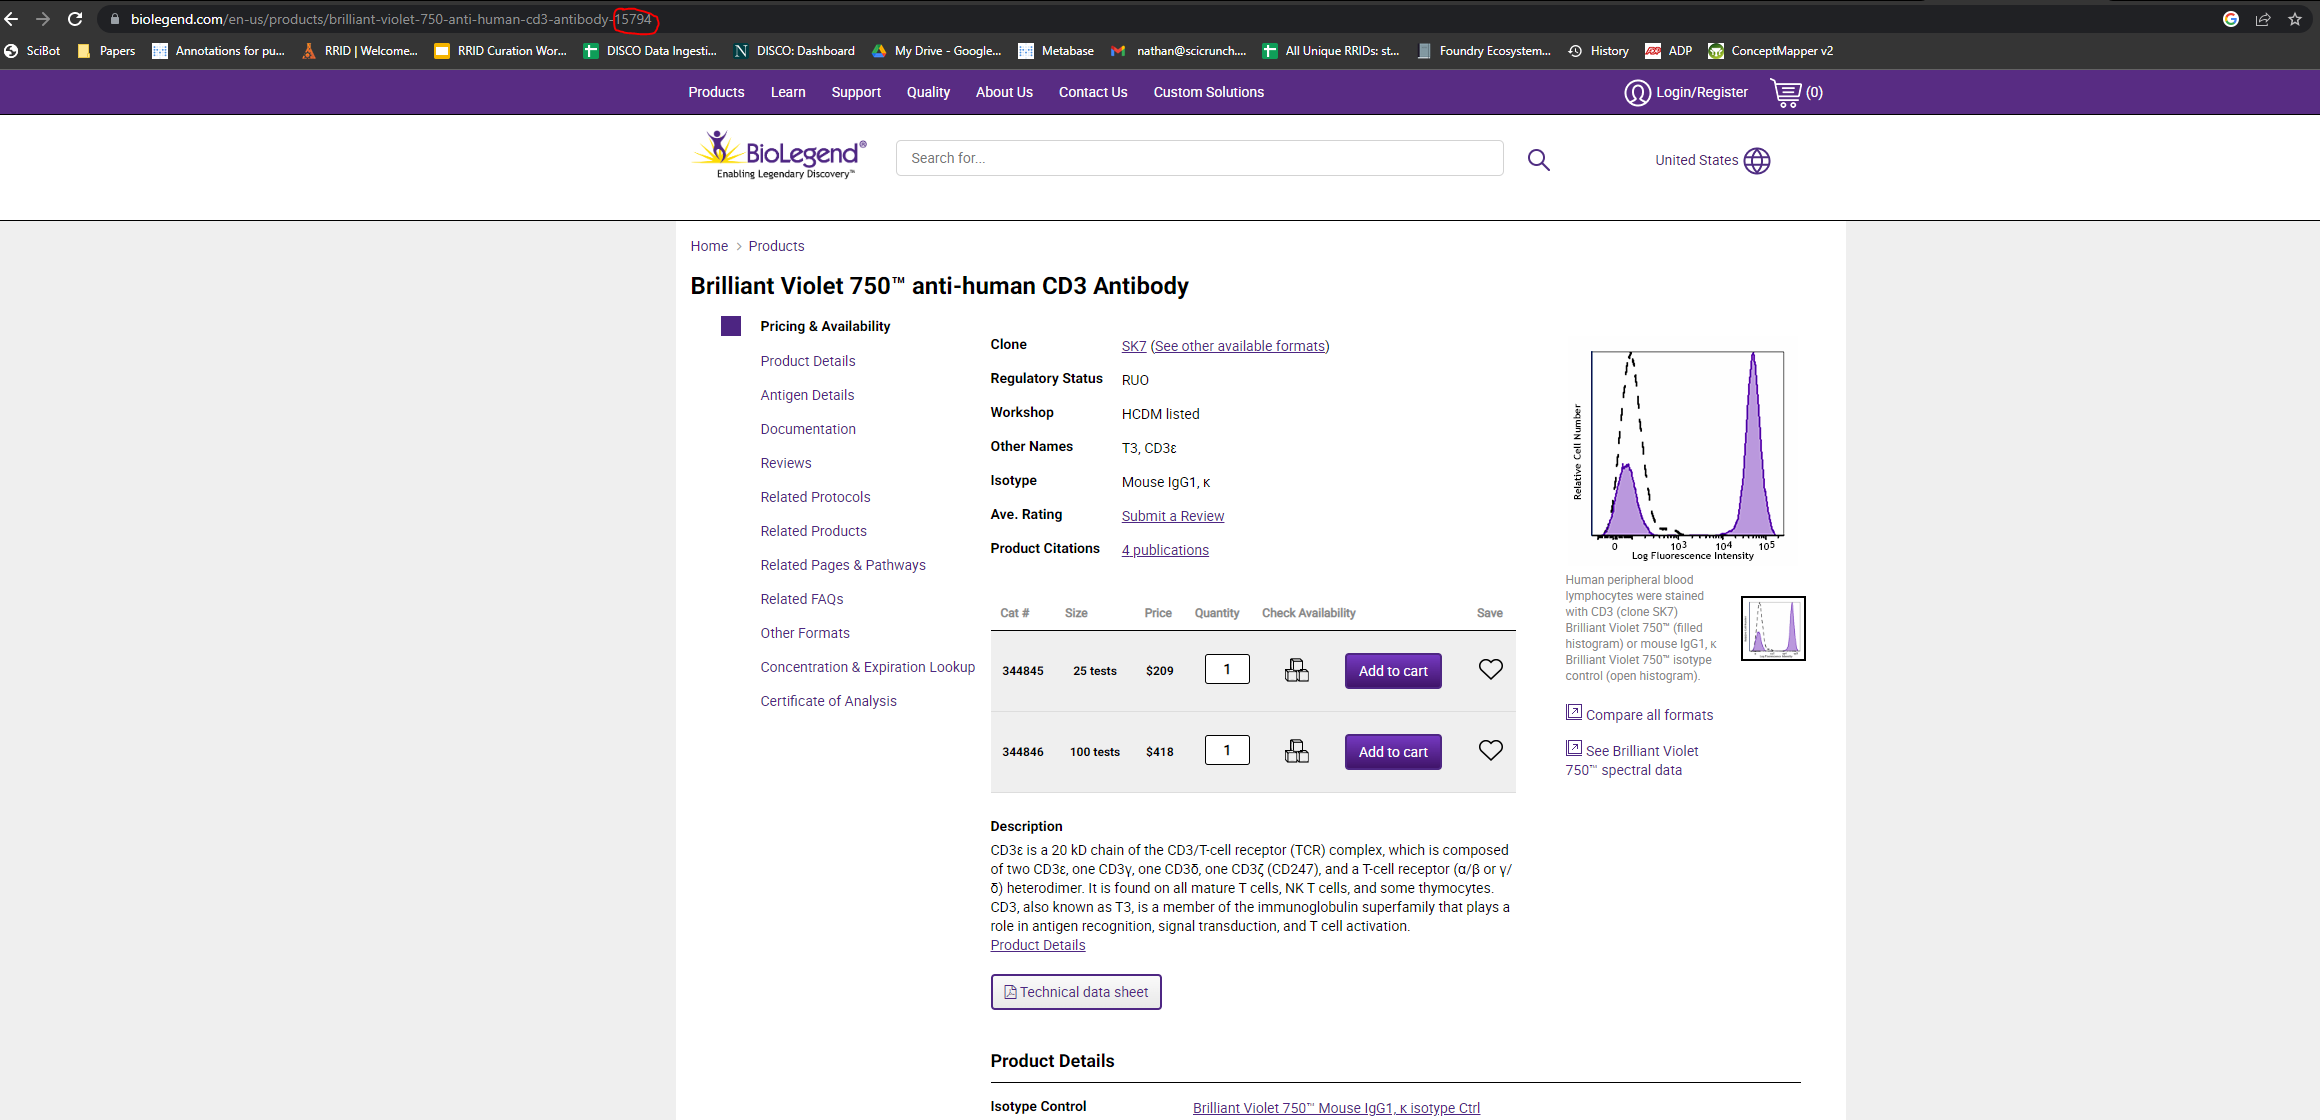

### Sometimes a discontinued product will cause the webIDs to become misaligned.

In [9]:
web_df = pd.DataFrame().assign(webIDs=webID)
web_df.to_csv(r"C:\Users\Natei\Desktop\OD_annos_21\OD_columns_in_order_21\webIDs.csv")

# Step 3

## After exporting the data and copying it to your main sheet make sure you update the excel document that is being read from in STEP 1 to ensure you don't lookup the webIDs you already have.